In [1]:
#Feature Selection Techniques
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('data.csv',usecols=['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'])

In [3]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.shape

(569, 31)

In [5]:
X=df.drop(labels=['diagnosis'],axis=1)
y=df['diagnosis']

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [7]:
X_train.shape,X_test.shape

((398, 30), (171, 30))

In [8]:
#Feature Selection

In [9]:
#1. variance Threshol technique

In [10]:
#Removing The constant features
from sklearn.feature_selection import VarianceThreshold

In [11]:
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(X_train)

VarianceThreshold(threshold=0)

In [12]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [13]:
constant_columns=[col for col in X_train.columns
                 if col not in X_train.columns[var_thres.get_support()]]

In [14]:
constant_columns

[]

In [15]:
#We can see that the dataset does not contain any constant features

In [16]:
#Trying for Quasi-Constant features
var_thresh=VarianceThreshold(threshold=0.2)
var_thresh.fit(X_train)

VarianceThreshold(threshold=0.2)

In [17]:
var_thresh.get_support()

array([ True,  True,  True,  True, False, False, False, False, False,
       False, False,  True,  True,  True, False, False, False, False,
       False, False,  True,  True,  True,  True, False, False, False,
       False, False, False])

In [18]:
constant_cols=[column for column in X_train.columns
              if column not in X_train.columns[var_thresh.get_support()]]

In [19]:
constant_cols #These are the Quasi - Constant columns which have variance  spread <=0.20

['smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [20]:
len(X_train.columns[var_thresh.get_support()])

11

In [21]:
len(constant_cols)#There are 19 constant columns which can be removed

19

In [22]:
#Checking For Important Features Using ChiAquare

In [23]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [24]:
ordered_features=SelectKBest(score_func=chi2,k=10)

In [25]:
ordered_rank=ordered_features.fit(X_train,y_train)

In [26]:
df_scores=pd.DataFrame(ordered_rank.scores_,columns=['Score'])
dfcols=pd.DataFrame(X_train.columns)

In [27]:
features_rank=pd.concat([dfcols,df_scores],axis=1)

In [28]:
features_rank.columns=['Features','Score']

In [29]:
features_rank.nlargest(10,'Score')

,Features,Score
23,area_worst,82120.399064
3,area_mean,38725.738961
13,area_se,6601.773300
22,perimeter_worst,2610.156135
2,perimeter_mean,1412.805844
20,radius_worst,351.131112
0,radius_mean,187.382301
12,perimeter_se,184.151502
21,texture_worst,111.008697
1,texture_mean,54.763850


In [30]:
# These 10 are the most important features according to Chi-Square Test

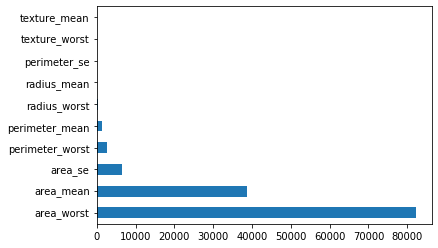

In [31]:
ranked_features=pd.Series(ordered_rank.scores_,index=X_train.columns)
ranked_features.nlargest(10).plot(kind='barh')
plt.show()

In [32]:
#USing Correlation for removing the Independent Correlated  Features

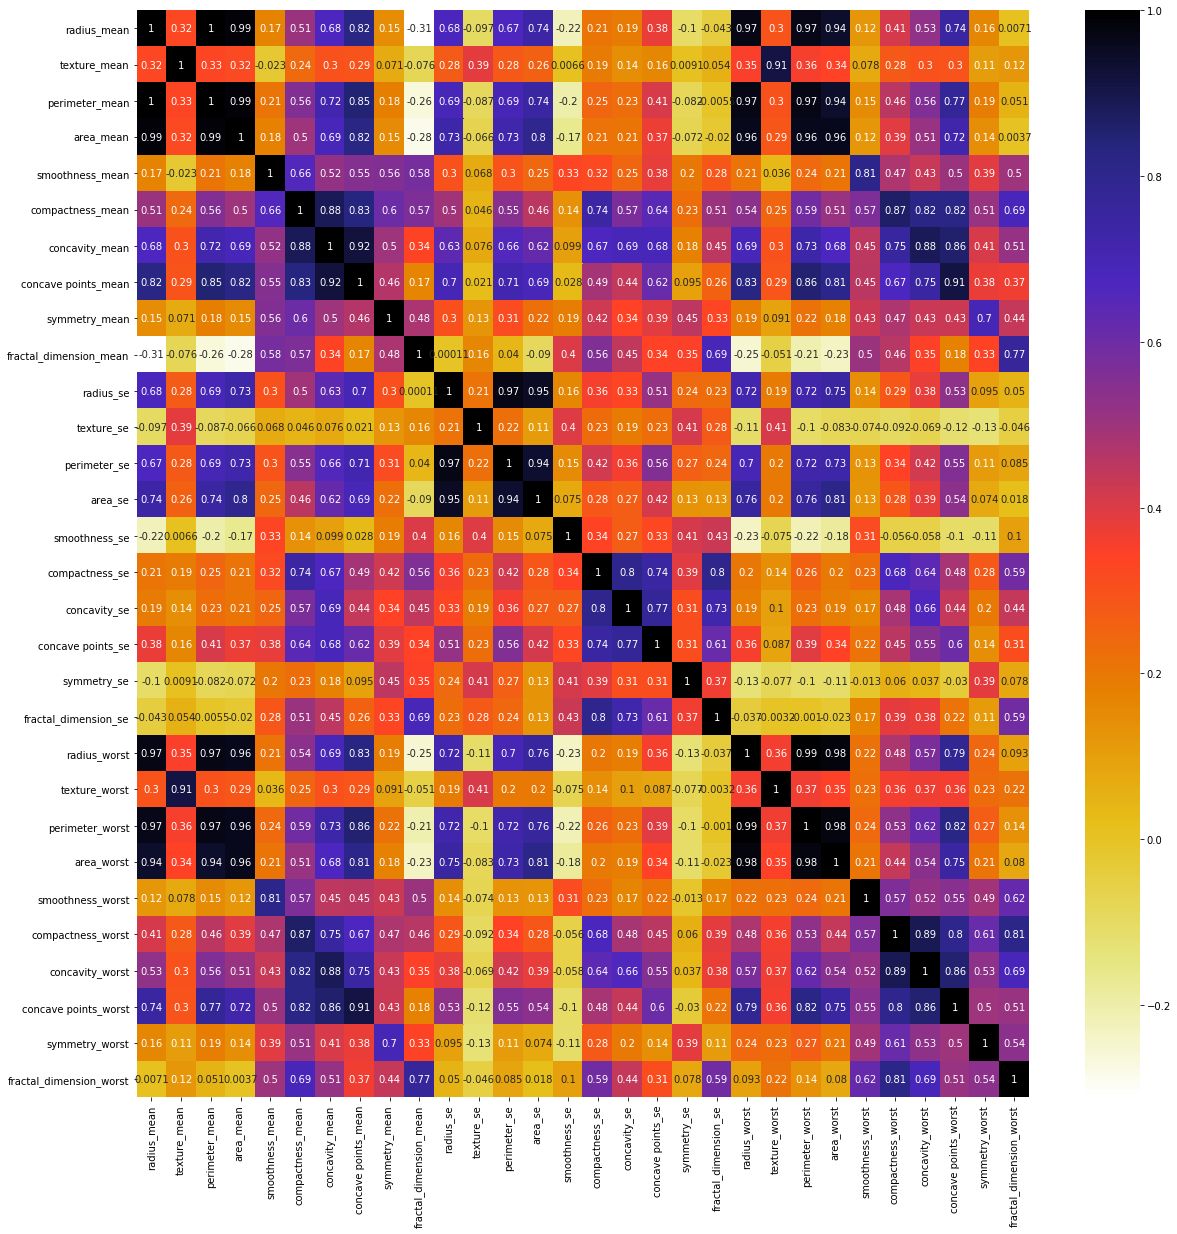

In [33]:
import seaborn as sns
corr=df.iloc[:,1:].corr()
top_features=corr.index
plt.figure(figsize=(20,20))
sns.heatmap(df[top_features].corr(),annot=True,cmap=plt.cm.CMRmap_r)

In [34]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set() 
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]  
                col_corr.add(colname)
    return col_corr

In [35]:
correlation(X_train,0.9) #THESE FEATURES CAN BE REMOVED SINCE THESE FEATURES ARE HIGHLY CORRELATED WITH THE INDEPENDENT FEATURES

{'area_mean',
 'area_se',
 'area_worst',
 'concave points_mean',
 'concave points_worst',
 'perimeter_mean',
 'perimeter_se',
 'perimeter_worst',
 'radius_worst',
 'texture_worst'}

In [36]:
#FINDING IMPORTANT FEATURES  USING MUTUAL INFO (Decision Trees)

In [37]:
from sklearn.feature_selection import mutual_info_classif
mutual_data=mutual_info_classif(X,y)


In [38]:
mutual_info=pd.Series(mutual_data,index=X.columns)


In [39]:
mutual_info.sort_values(ascending=False)

perimeter_worst            0.474257
area_worst                 0.464847
radius_worst               0.451193
concave points_mean        0.442497
concave points_worst       0.434875
perimeter_mean             0.403169
concavity_mean             0.373909
radius_mean                0.370836
area_mean                  0.359054
area_se                    0.340711
concavity_worst            0.315918
perimeter_se               0.272081
radius_se                  0.248174
compactness_worst          0.224700
compactness_mean           0.215145
concave points_se          0.127559
texture_worst              0.124258
concavity_se               0.116778
smoothness_worst           0.103126
texture_mean               0.096933
symmetry_worst             0.088948
smoothness_mean            0.080707
compactness_se             0.077657
fractal_dimension_worst    0.067740
symmetry_mean              0.061988
fractal_dimension_se       0.038117
smoothness_se              0.014630
symmetry_se                0

In [40]:
mutual_info.nlargest(10)

perimeter_worst         0.474257
area_worst              0.464847
radius_worst            0.451193
concave points_mean     0.442497
concave points_worst    0.434875
perimeter_mean          0.403169
concavity_mean          0.373909
radius_mean             0.370836
area_mean               0.359054
area_se                 0.340711
dtype: float64

In [41]:
#Fisher Score

In [42]:
df=df.groupby(df['diagnosis'])

In [44]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.147100,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890
1,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.070170,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
2,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.127900,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
3,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.105200,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
4,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.104300,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
19,B,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,...,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
20,B,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,...,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
21,B,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,...,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
37,B,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,...,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
46,B,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,...,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409


In [45]:
df1 = df.get_group('B')
df2 = df.get_group('M')

In [47]:
df1_mean = df1.mean()
df2_mean = df2.mean()

In [48]:
df1_var = df1.var()
df2_var = df2.var()

In [49]:
def fisher(x,y):
    return abs(((np.mean(df1) - np.mean(df2))**2)/(np.var(df1) + np.var(df2)))

In [51]:
fisher_scores=fisher(df1,df2)

In [54]:
fisher_scores.nlargest(10) #TOP 10 features according to feature scores

concave points_worst    3.405271
perimeter_worst         2.825258
concave points_mean     2.714891
radius_worst            2.711798
perimeter_mean          2.263259
radius_mean             2.112601
area_worst              1.948502
concavity_mean          1.758587
area_mean               1.740605
concavity_worst         1.542132
dtype: float64